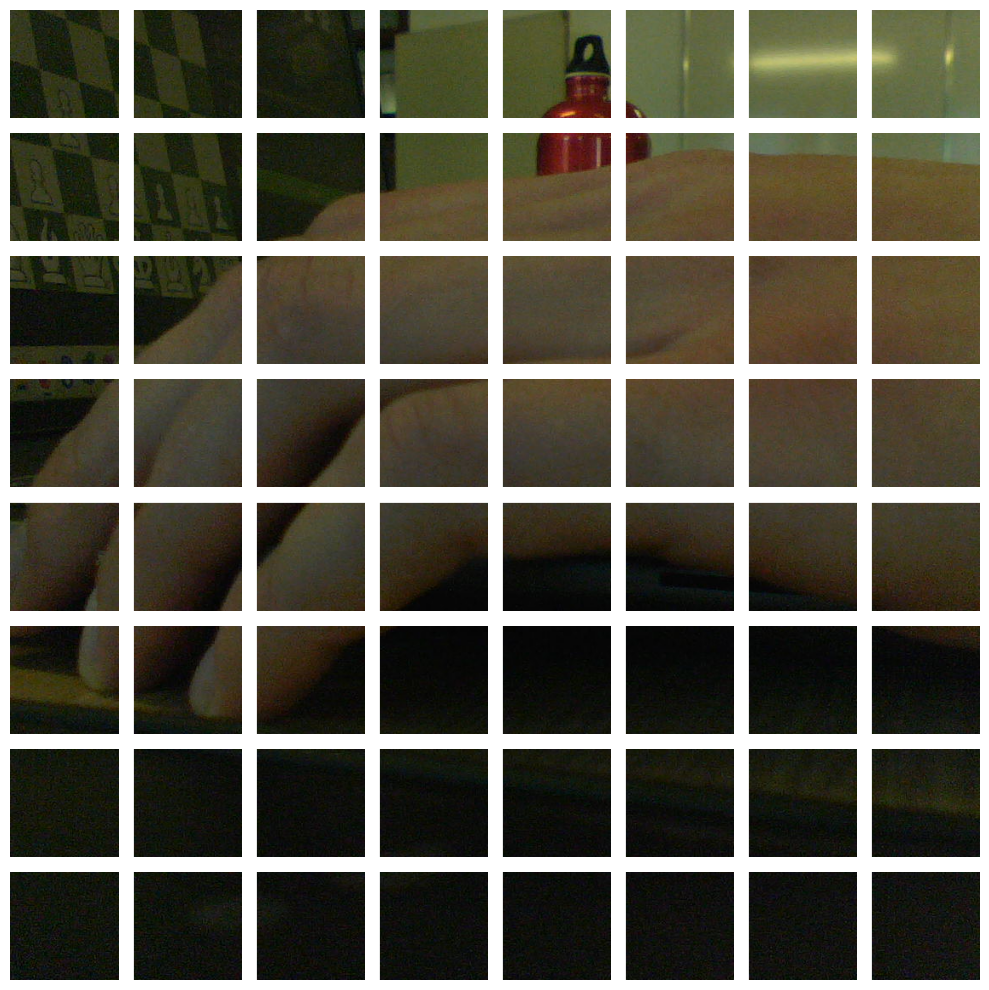

In [3]:
#Script to acquire video from a camera and display it with a grid overlay
#Script to be used for calibrating the camera with the 8x8 chessboard grid

import cv2
from matplotlib import pyplot as plt

# Connects to webcam
cap = cv2.VideoCapture(0)

# Automatically grab width and height from video feed
#width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1024)
#width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))



# Capture frame-by-frame
ret, frame = cap.read()

# Crop the frame to the center 1024x1024 region
frame_resized = frame[0:1024, 128:1152]

# Draw an 8x8 grid
for i in range(1, 8):
    cv2.line(frame_resized, (0, i * 128), (1024, i * 128), (255, 255, 255), 1) # horizontal lines
    cv2.line(frame_resized, (i * 128, 0), (i * 128, 1024), (255, 255, 255), 1) # vertical lines
    

# Cut the frame into 64 squares of 128x128
squares = []
for row in range(8):
    for col in range(8):
        square = frame_resized[row * 128:(row + 1) * 128, col * 128:(col + 1) * 128]
        squares.append(square)

# Display the squares
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
for idx, ax in enumerate(axes.flat):
    ax.imshow(cv2.cvtColor(squares[idx], cv2.COLOR_BGR2RGB))
    ax.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()

# When everything done, release the capture and destroy the windows
cap.release()
